In [1]:
from dataset import COCOSegmentation
import utils


In [2]:
train_trans, val_trans = utils.get_transforms()
dataset_test = COCOSegmentation(args=None, split='val', my_transforms=val_trans)
classes = ['', 'dent', 'scratch', 'crack', 'glass_shatter', 'lamp_broken', 'tire_flat']
sample = dataset_test[170]
print(len(dataset_test))

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
810


/Users/dragos/Licenta/Thesis/dataset.py:56: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1724788636309/work/torch/csrc/utils/tensor_new.cpp:281.)
  masks = Mask(torch.as_tensor(masks, dtype=torch.uint8))


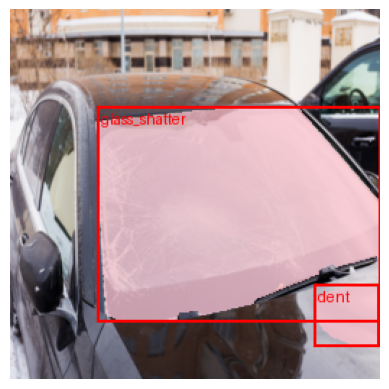

In [3]:
import torch
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision.transforms.functional import to_tensor, to_pil_image
import matplotlib.pyplot as plt
import torchvision.transforms as T

image_tensor = (sample[0] * 255).to(dtype=torch.uint8)
image_tensor = image_tensor.type(torch.uint8)

masks = sample[1]['masks'] > 0  # Convert masks to boolean
image_with_masks = draw_segmentation_masks(image_tensor, masks.squeeze(1), colors="pink", alpha=0.7)

boxes = sample[1]['boxes']
labels = [classes[int(label)] for label in sample[1]['labels']]
image_with_boxes = draw_bounding_boxes(image_with_masks, boxes, colors="red", labels=labels, width=2)

plt.imshow(to_pil_image(image_with_boxes))
plt.axis('off')
plt.show()

In [7]:
sample[0].shape  # Access the labels

torch.Size([3, 256, 256])